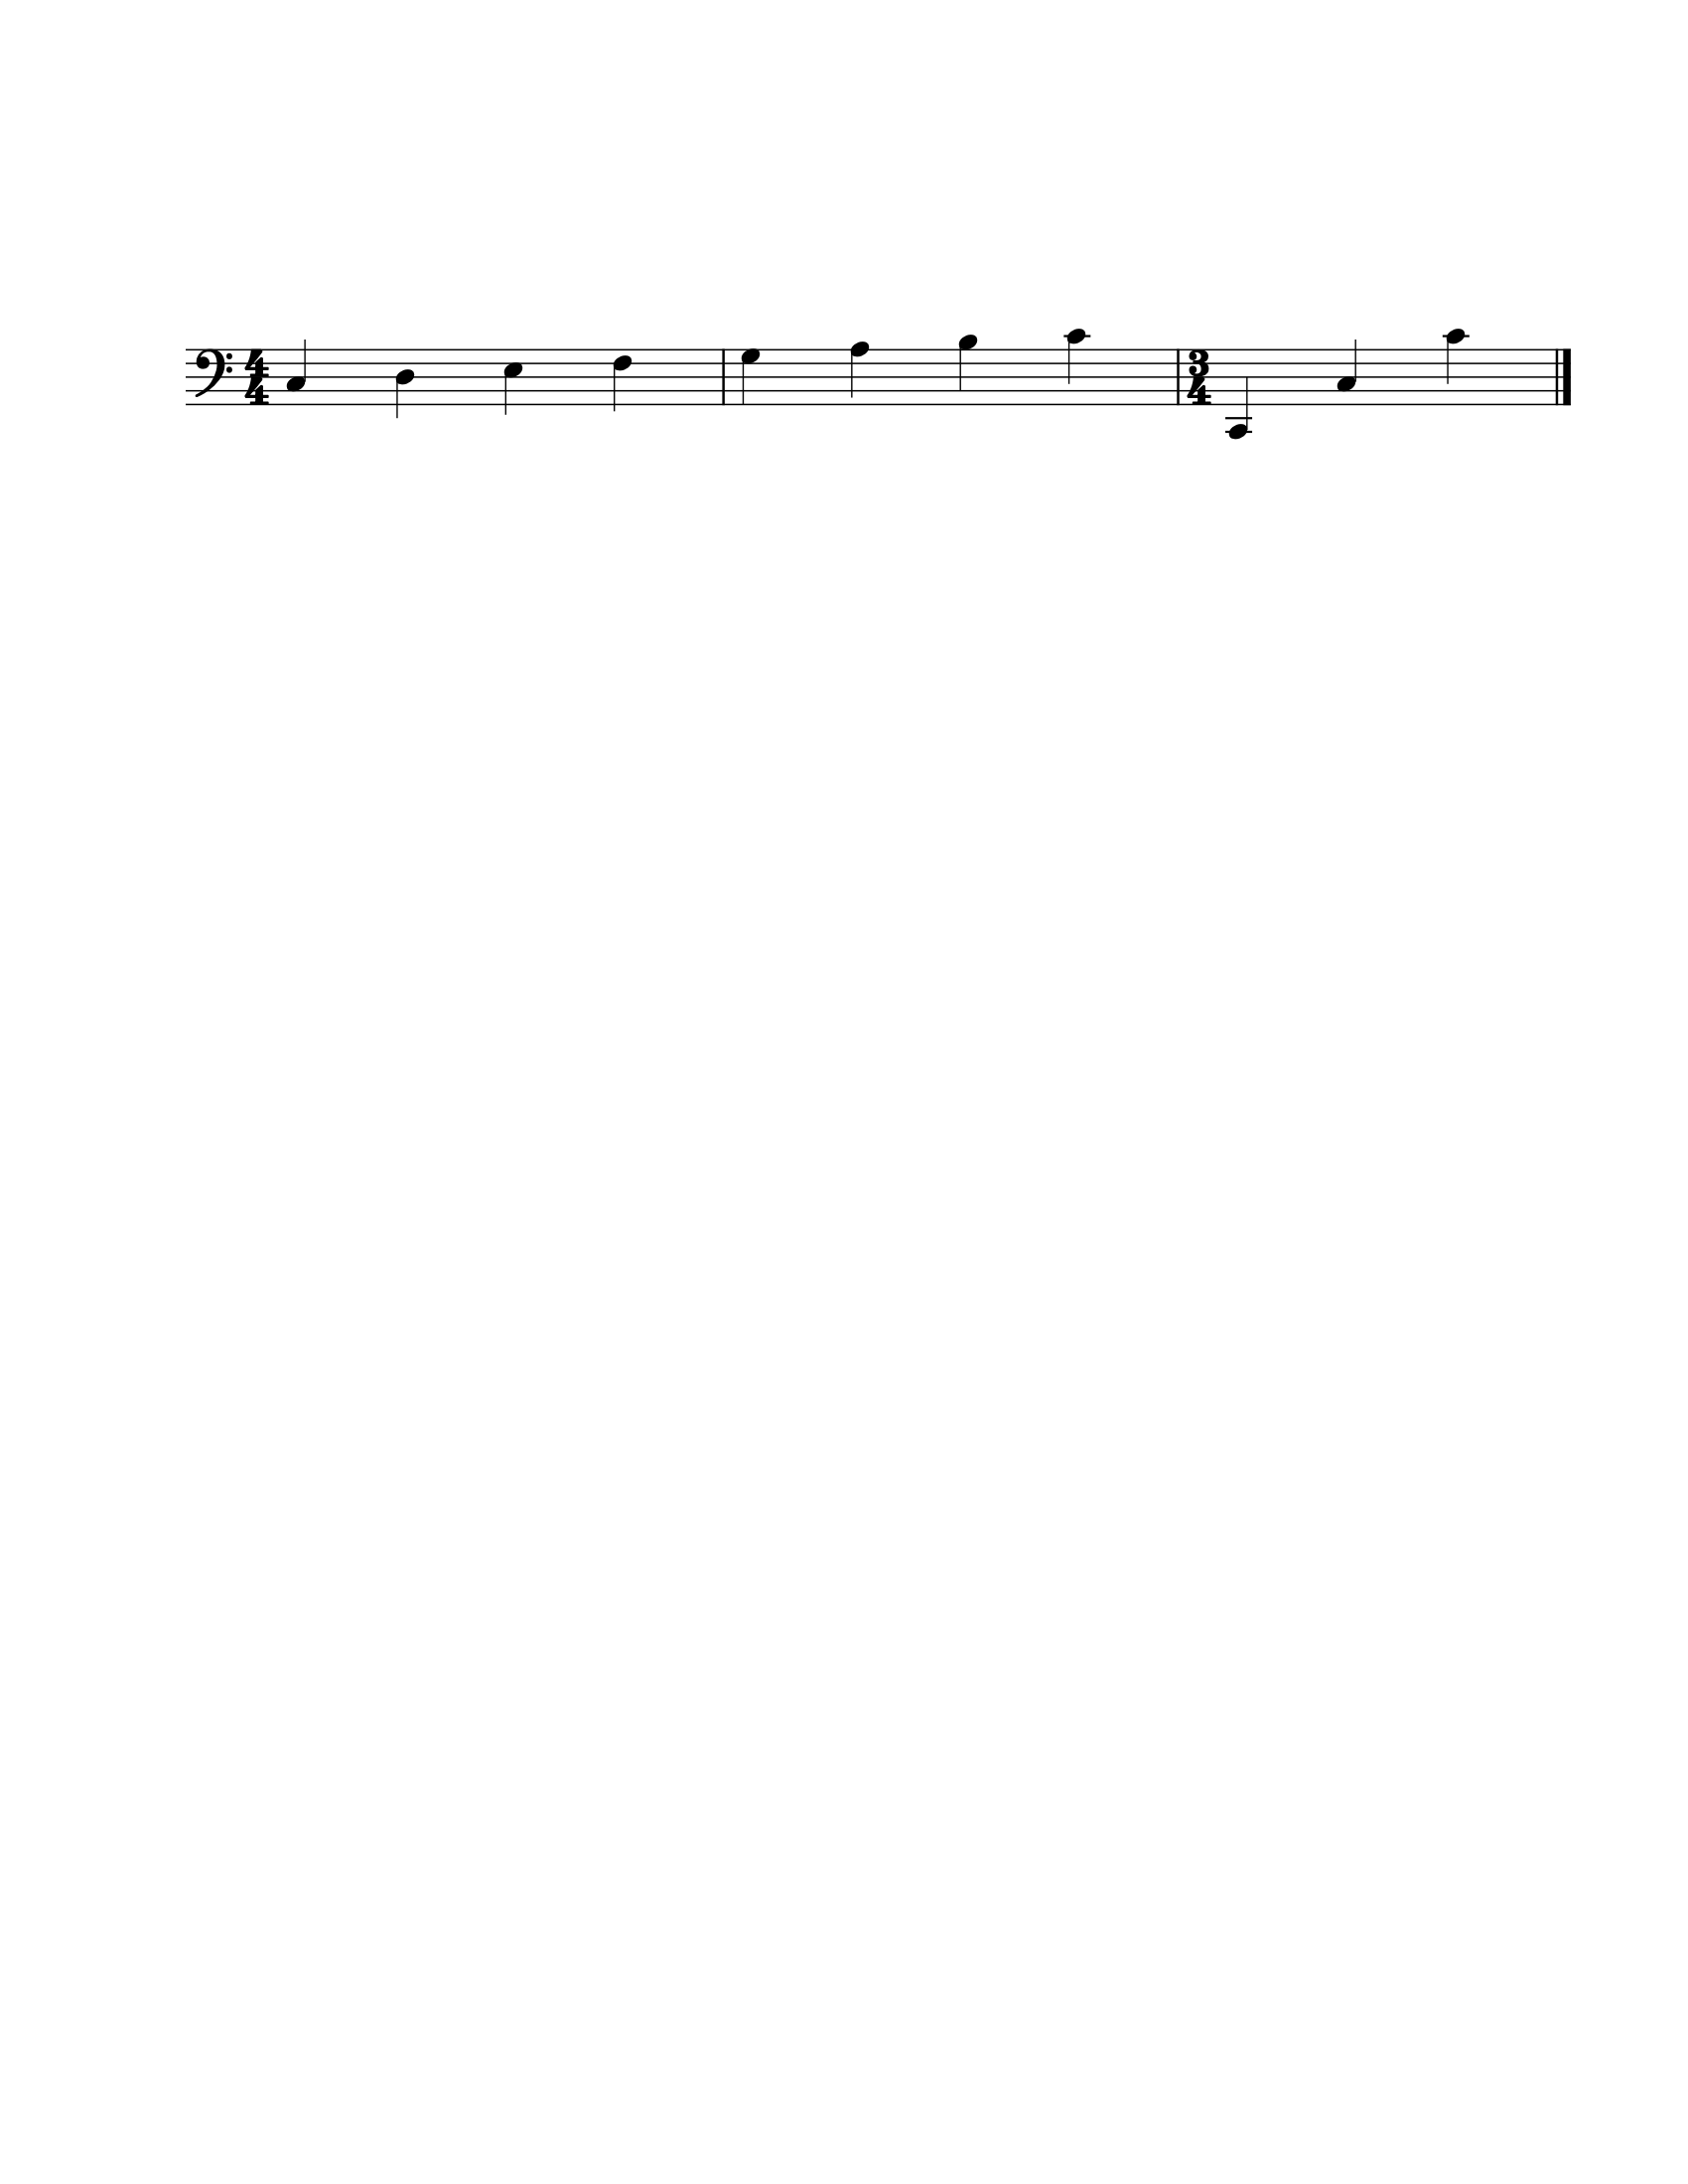

In [4]:
from music21 import *
s = converter.parse('tinyNotation: 4/4 C4 D4 E4 F4 G4 A4 B4 c4 3/4 CC4 C4 c4 ')
s.show()

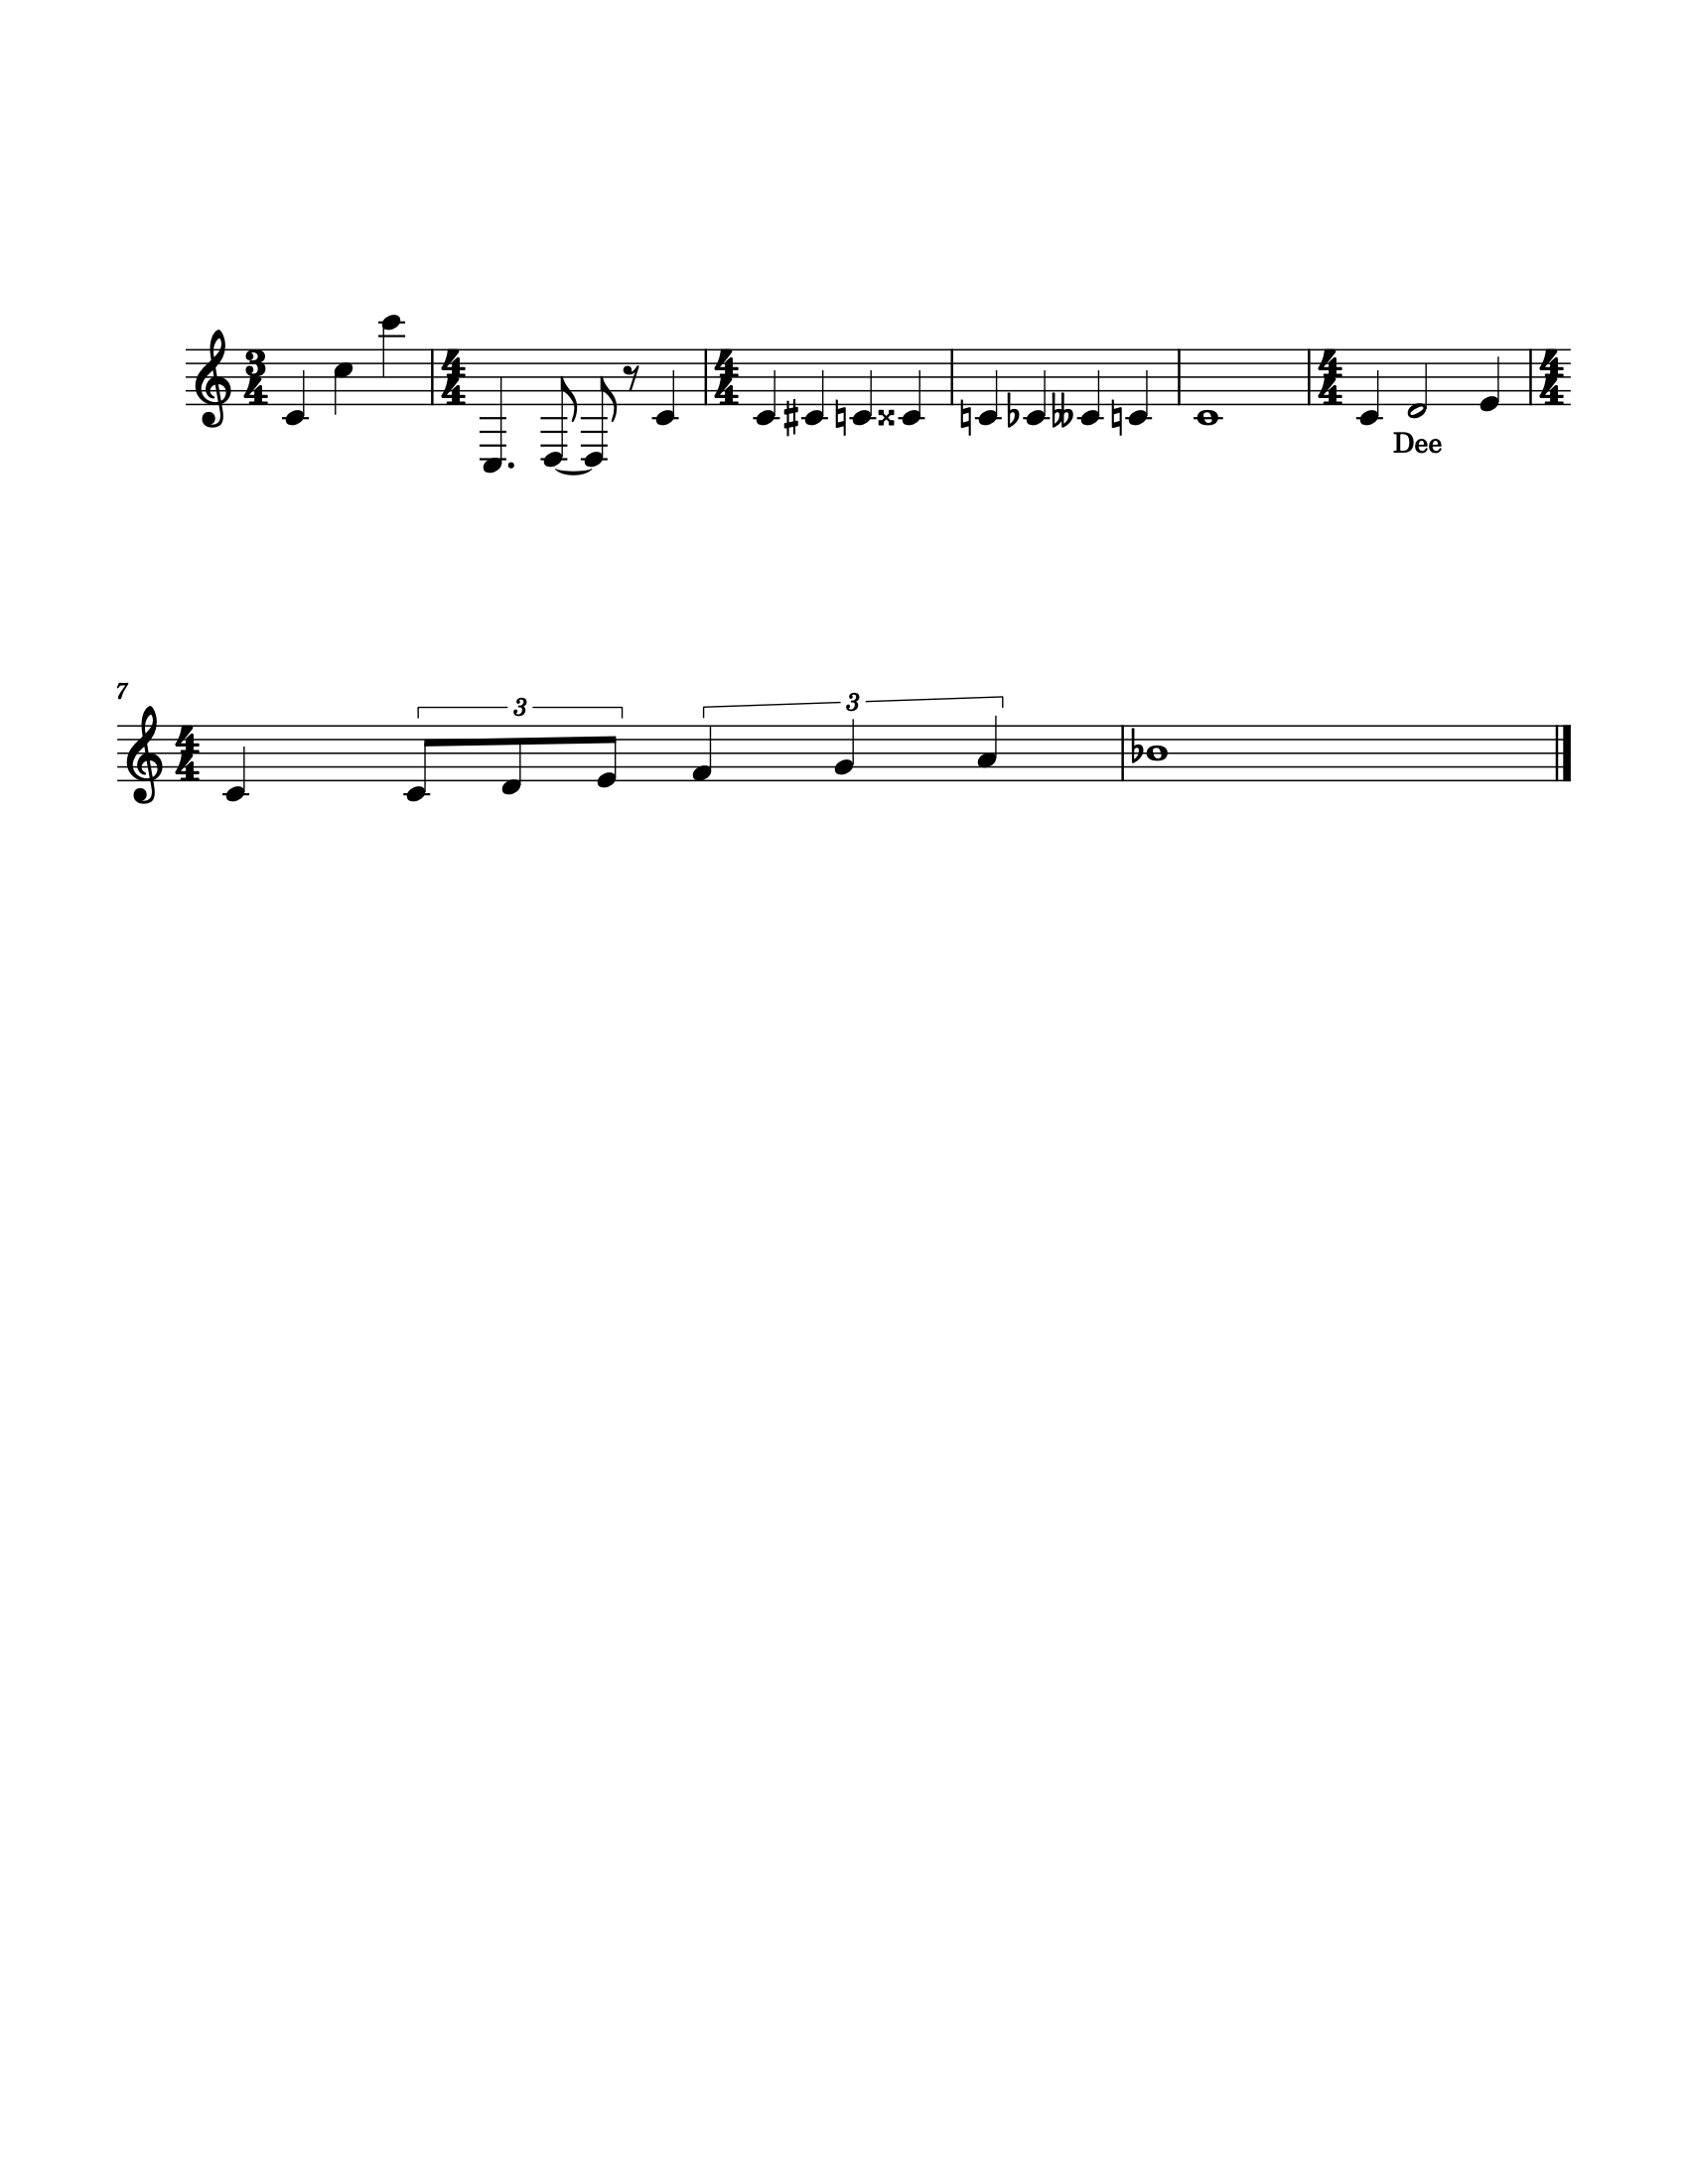

In [9]:
s = converter.parse("tinyNotation: 3/4 c4 c'4 c''4 4/4 C.4 D8~ D8 r c4 4/4 c4 c# c c## cn c- c-- c c1 4/4 c4 d2_Dee e4 4/4 c4 trip{c8 d e} trip{f4 g a} b-1")
s.show()

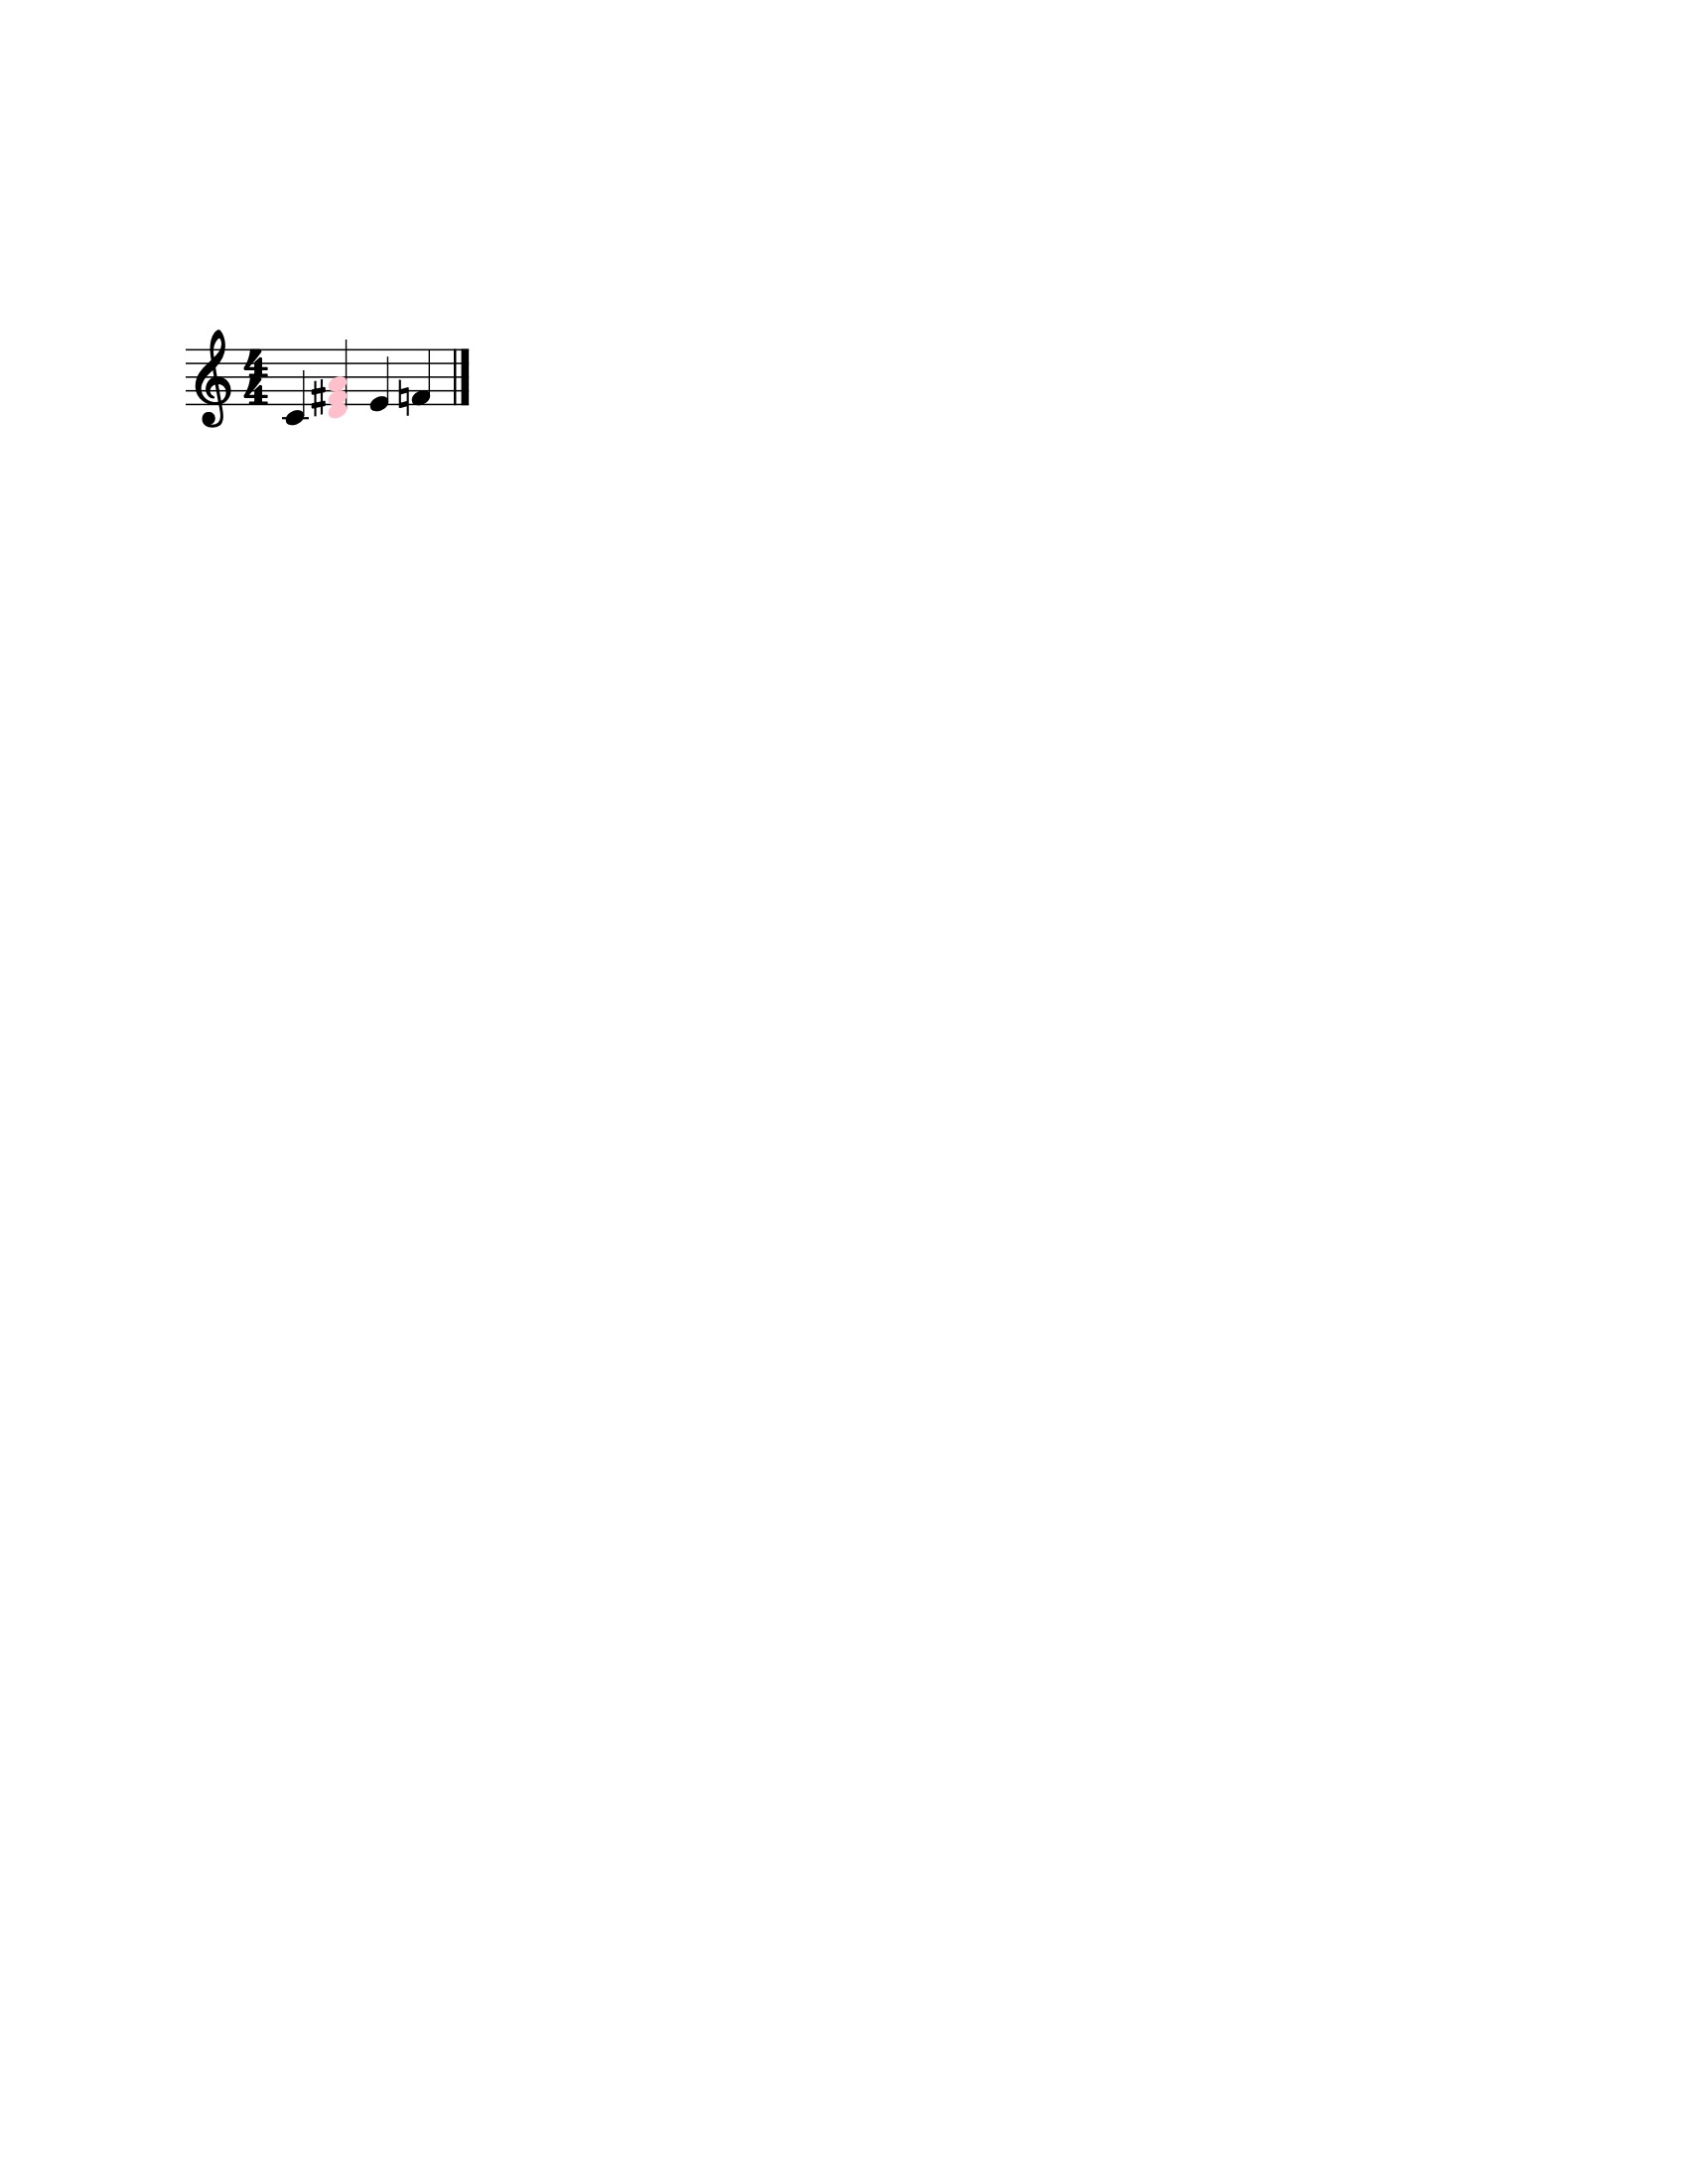

In [10]:
s = converter.parse('tinyNotation: 4/4 c4 d=id2 e f')
n = s.recurse().getElementById('id2')
ch = chord.Chord('D4 F#4 A4')
ch.style.color = 'pink'
n.activeSite.replace(n, ch)
s.show()

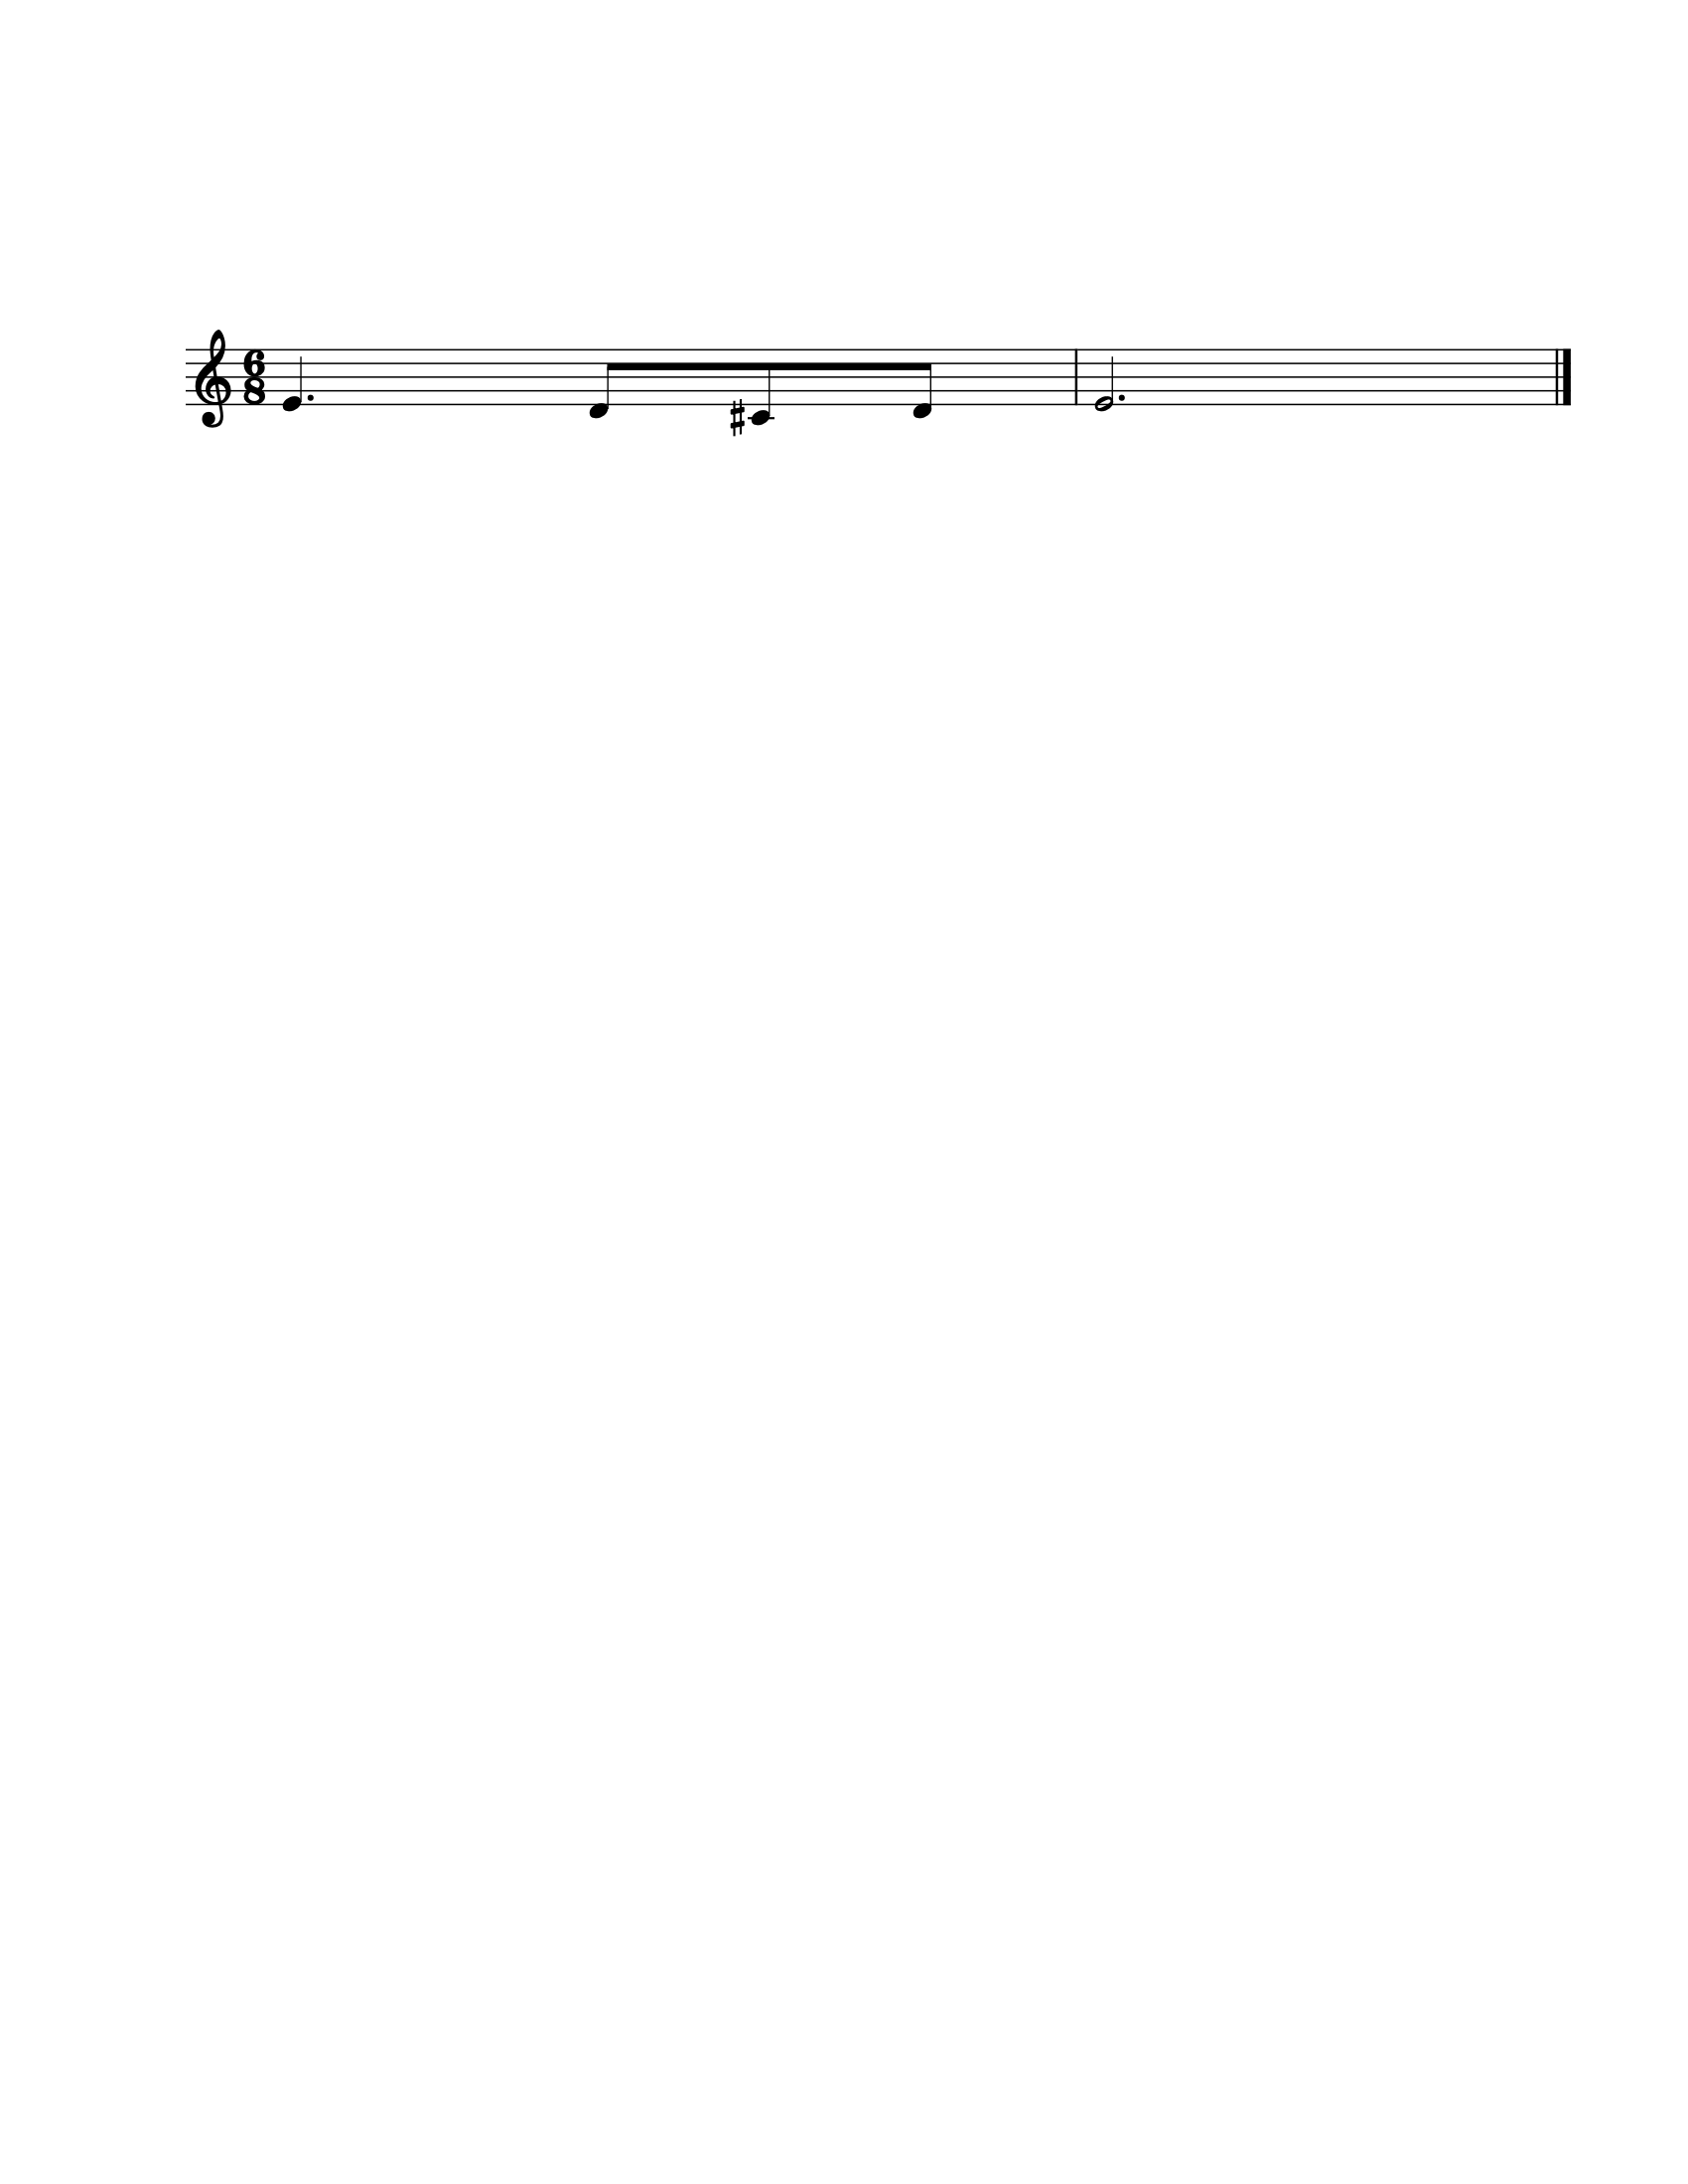

In [12]:
tnc = tinyNotation.Converter('6/8 e4. d8 c# d e2.')
tnc.parse()
s = tnc.stream
s.show()


In [13]:
class KeyToken(tinyNotation.Token):
    def parse(self, parent):
        keyName = self.token
        return key.Key(keyName)

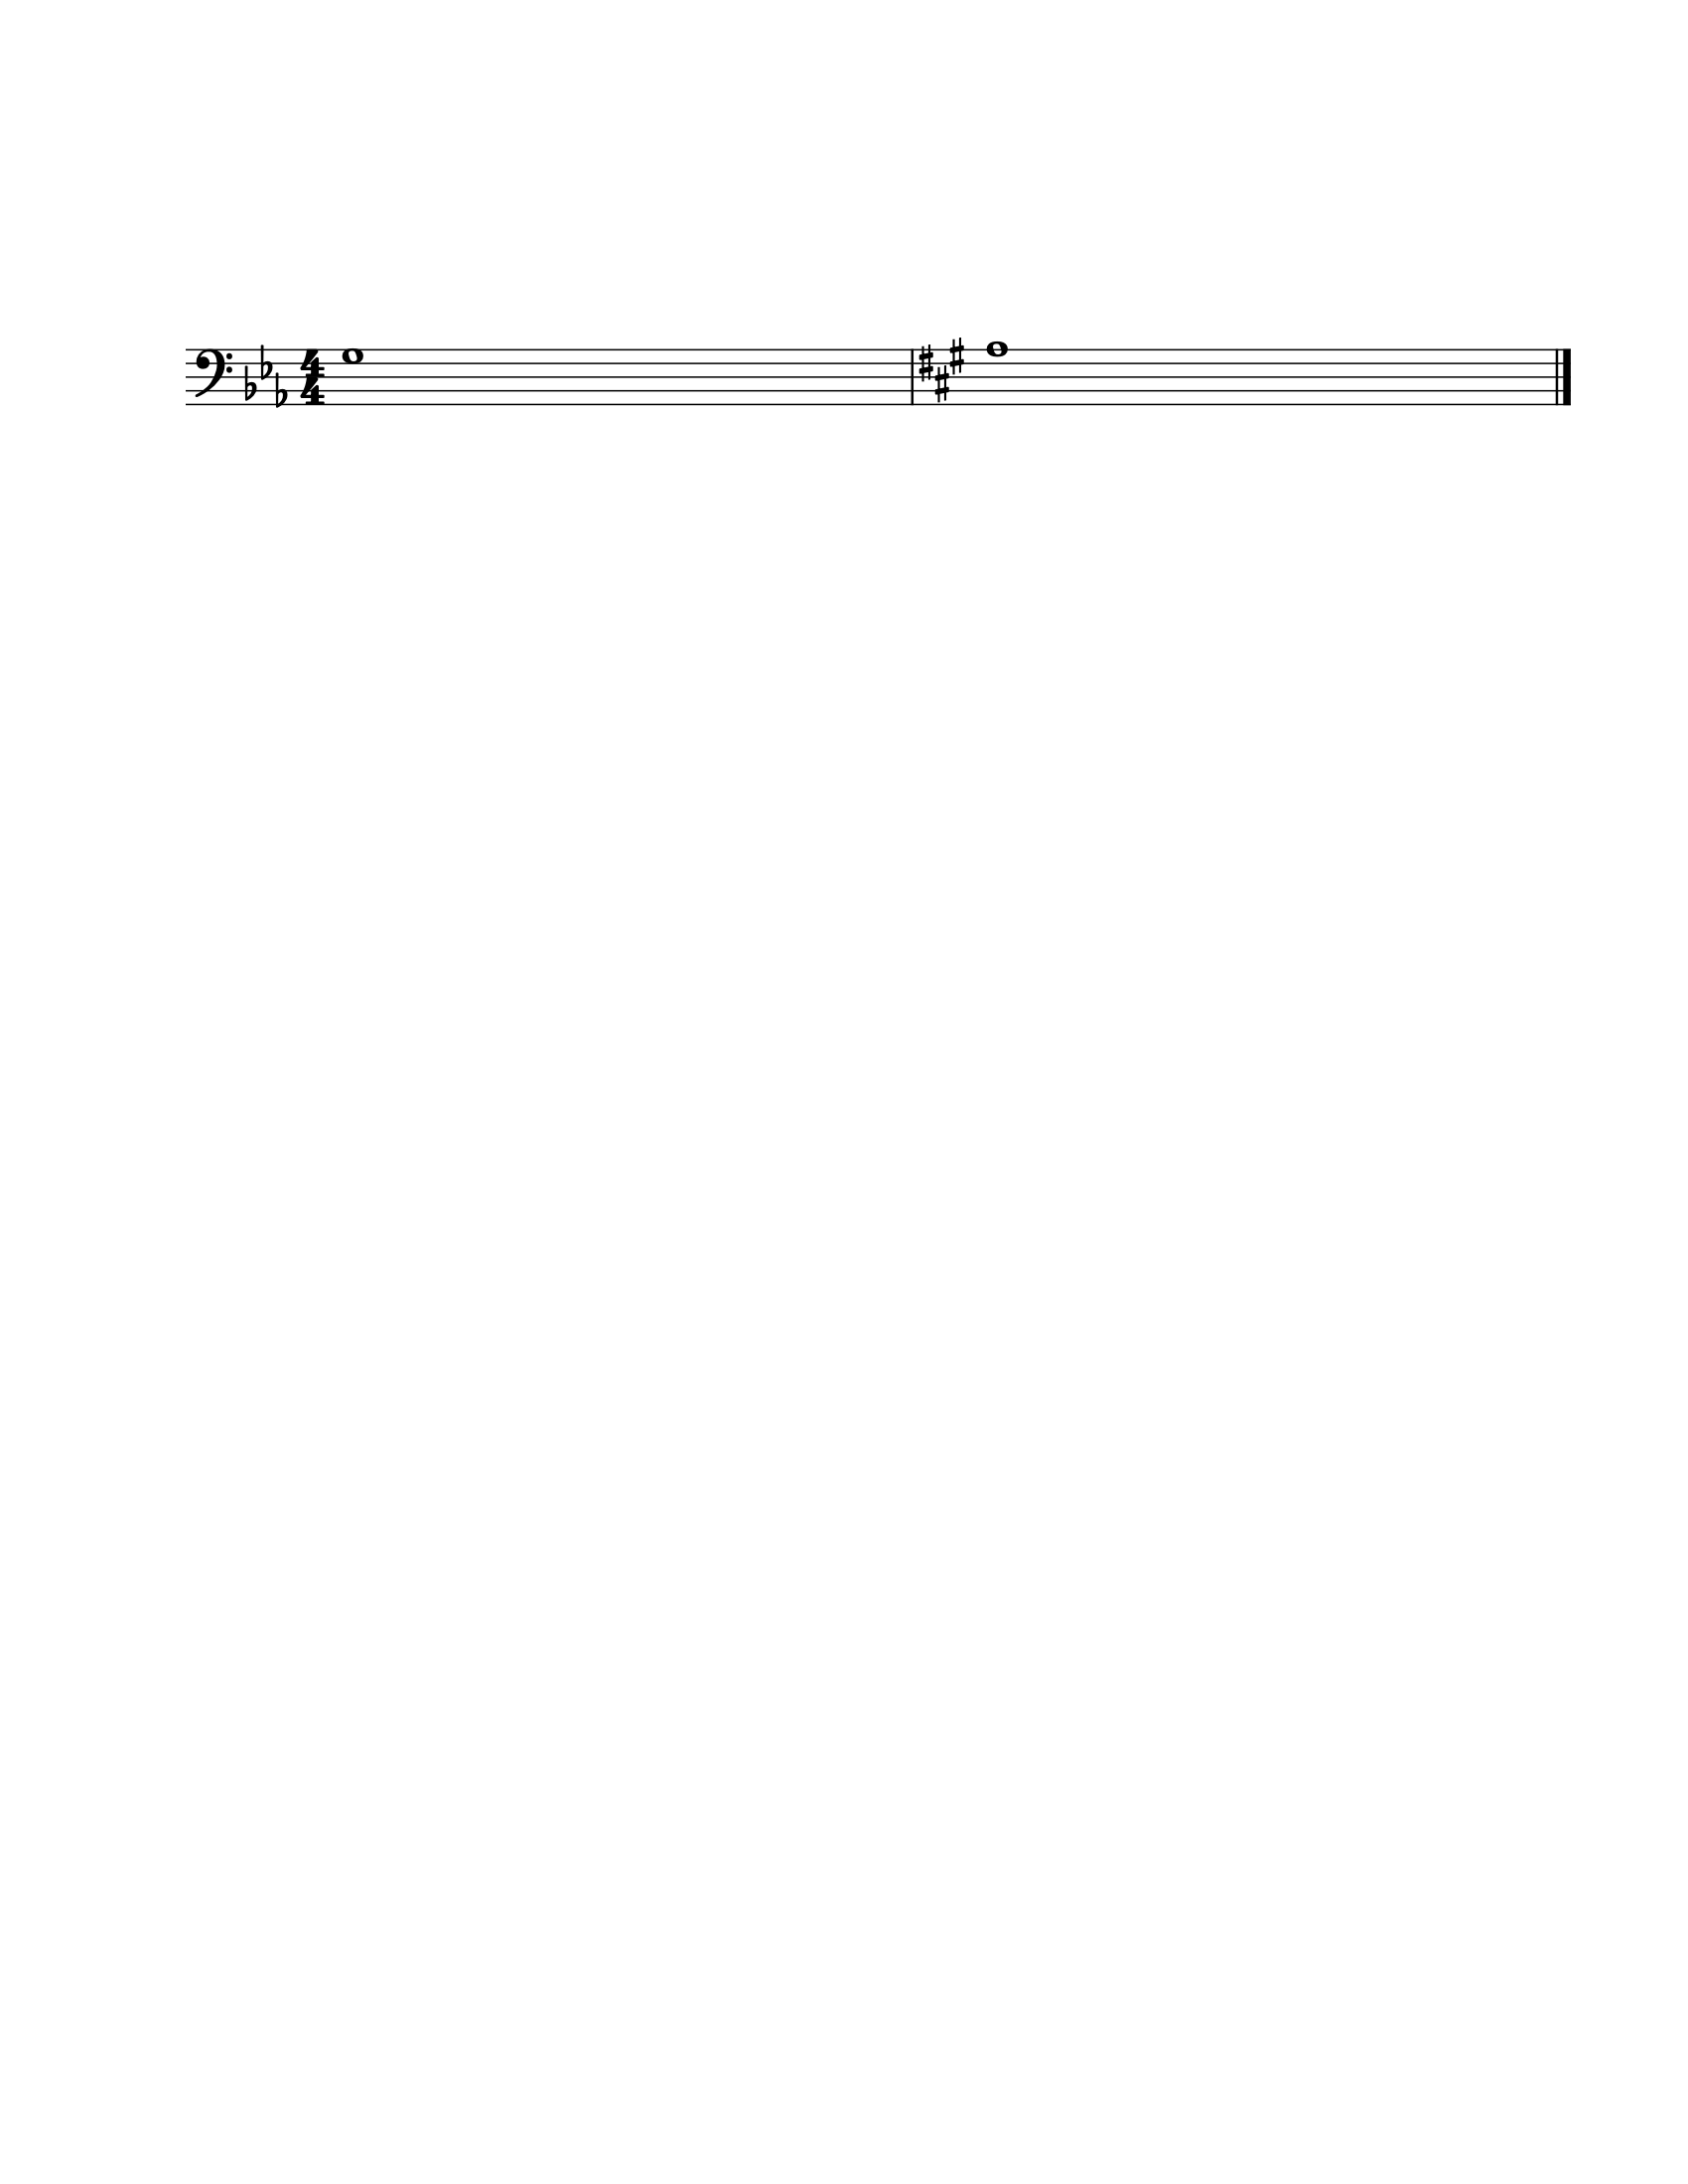

In [14]:
tnc = tinyNotation.Converter()
keyMapping = (r'k(.*)', KeyToken)
tnc.tokenMap.append(keyMapping)
tnc.load('4/4 kE- G1 kf# A1')
tnc.parse()
s = tnc.stream
s.show()

In [15]:
class ColorModifier(tinyNotation.Modifier):
    def postParse(self, m21Obj):
        m21Obj.style.color = self.modifierData
        return m21Obj

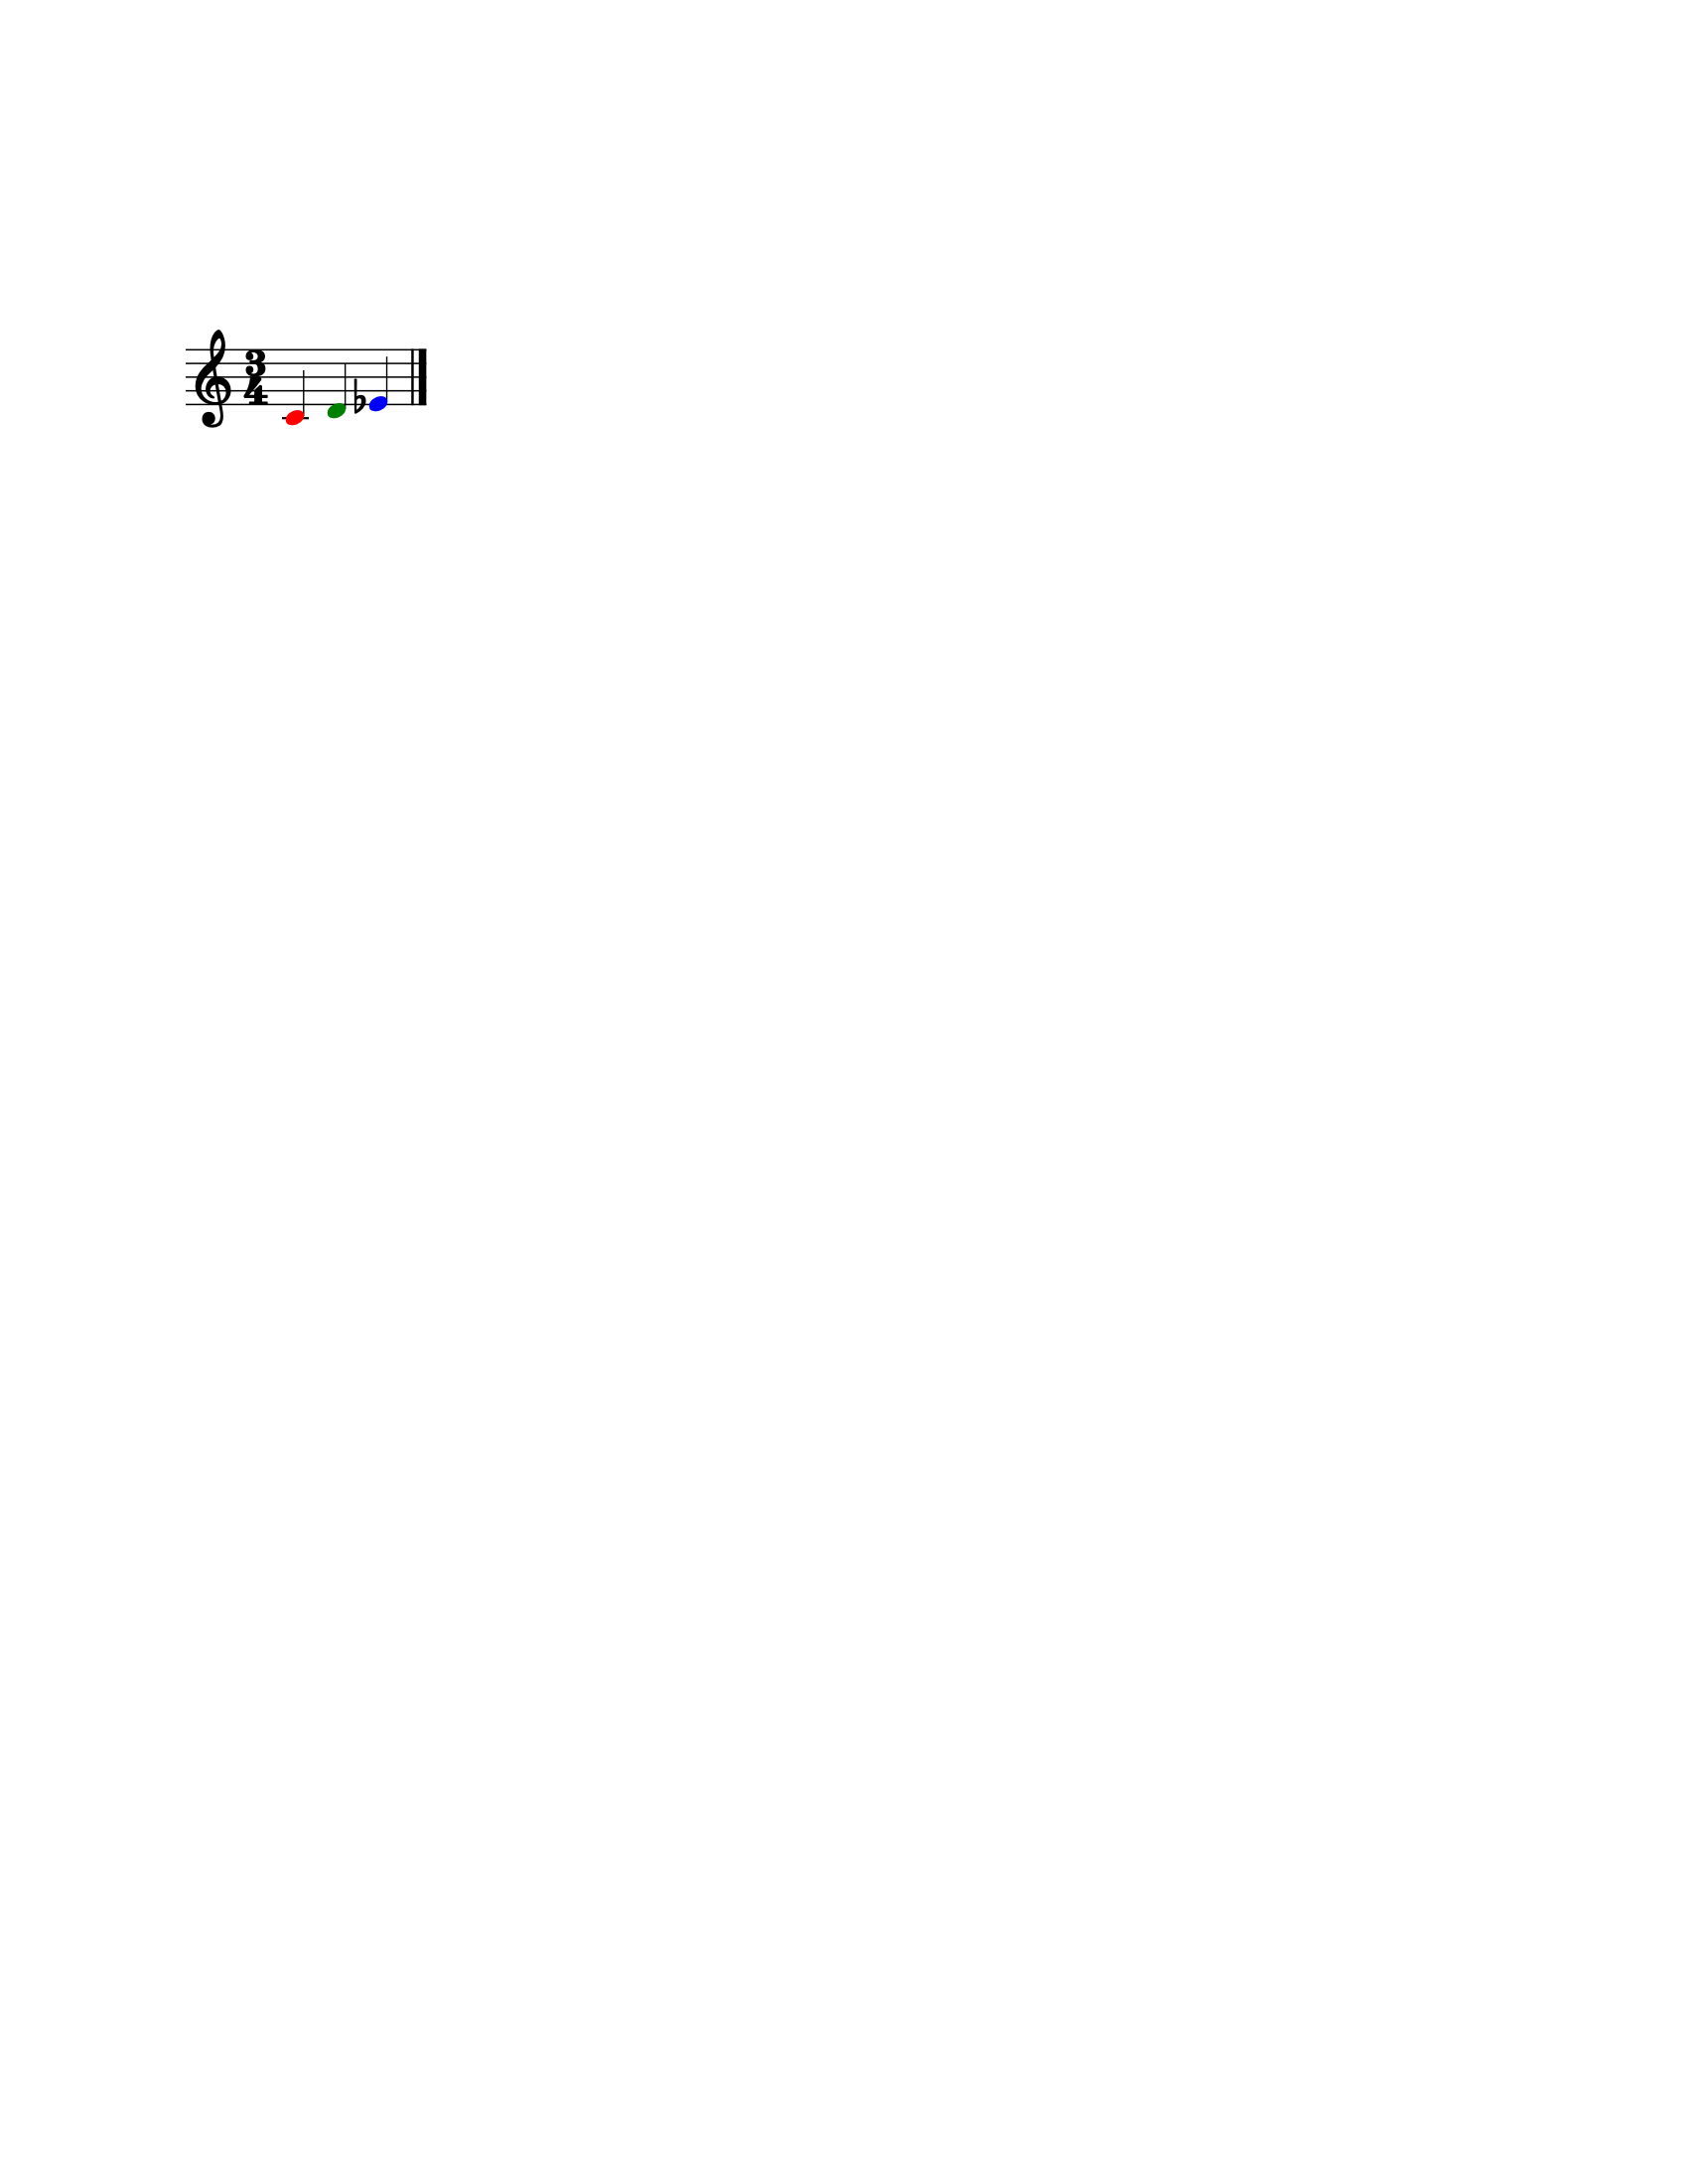

In [16]:
tnc.modifierAngle = ColorModifier
tnc.load('3/4 c4<red> d<green> e-<blue>')
tnc.parse()
tnc.stream.show()

In [17]:
class HarmonyModifier(tinyNotation.Modifier):
    def postParse(self, n):
        cs = harmony.ChordSymbol(n.pitch.name + self.modifierData)
        cs.duration = n.duration
        return cs

tnc.modifierUnderscore = HarmonyModifier
tnc.load('4/4 C2_maj7 D4_m E-_sus4')
tnc.parse().stream.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.harmony.ChordSymbol Cmaj7>
    {2.0} <music21.harmony.ChordSymbol Dm>
    {3.0} <music21.harmony.ChordSymbol E-sus4>
    {4.0} <music21.bar.Barline type=final>


In [18]:
class HarmonyModifier(tinyNotation.Modifier):
    def postParse(self, n):
        cs = harmony.ChordSymbol(n.pitch.name + self.modifierData)
        self.parent.stream.append(cs)
        return n

tnc.modifierUnderscore = HarmonyModifier
tnc.load('4/4 C2_maj7 D4_m E-_sus4')
tnc.parse().stream.show()

AttributeError: 'weakref' object has no attribute 'stream'

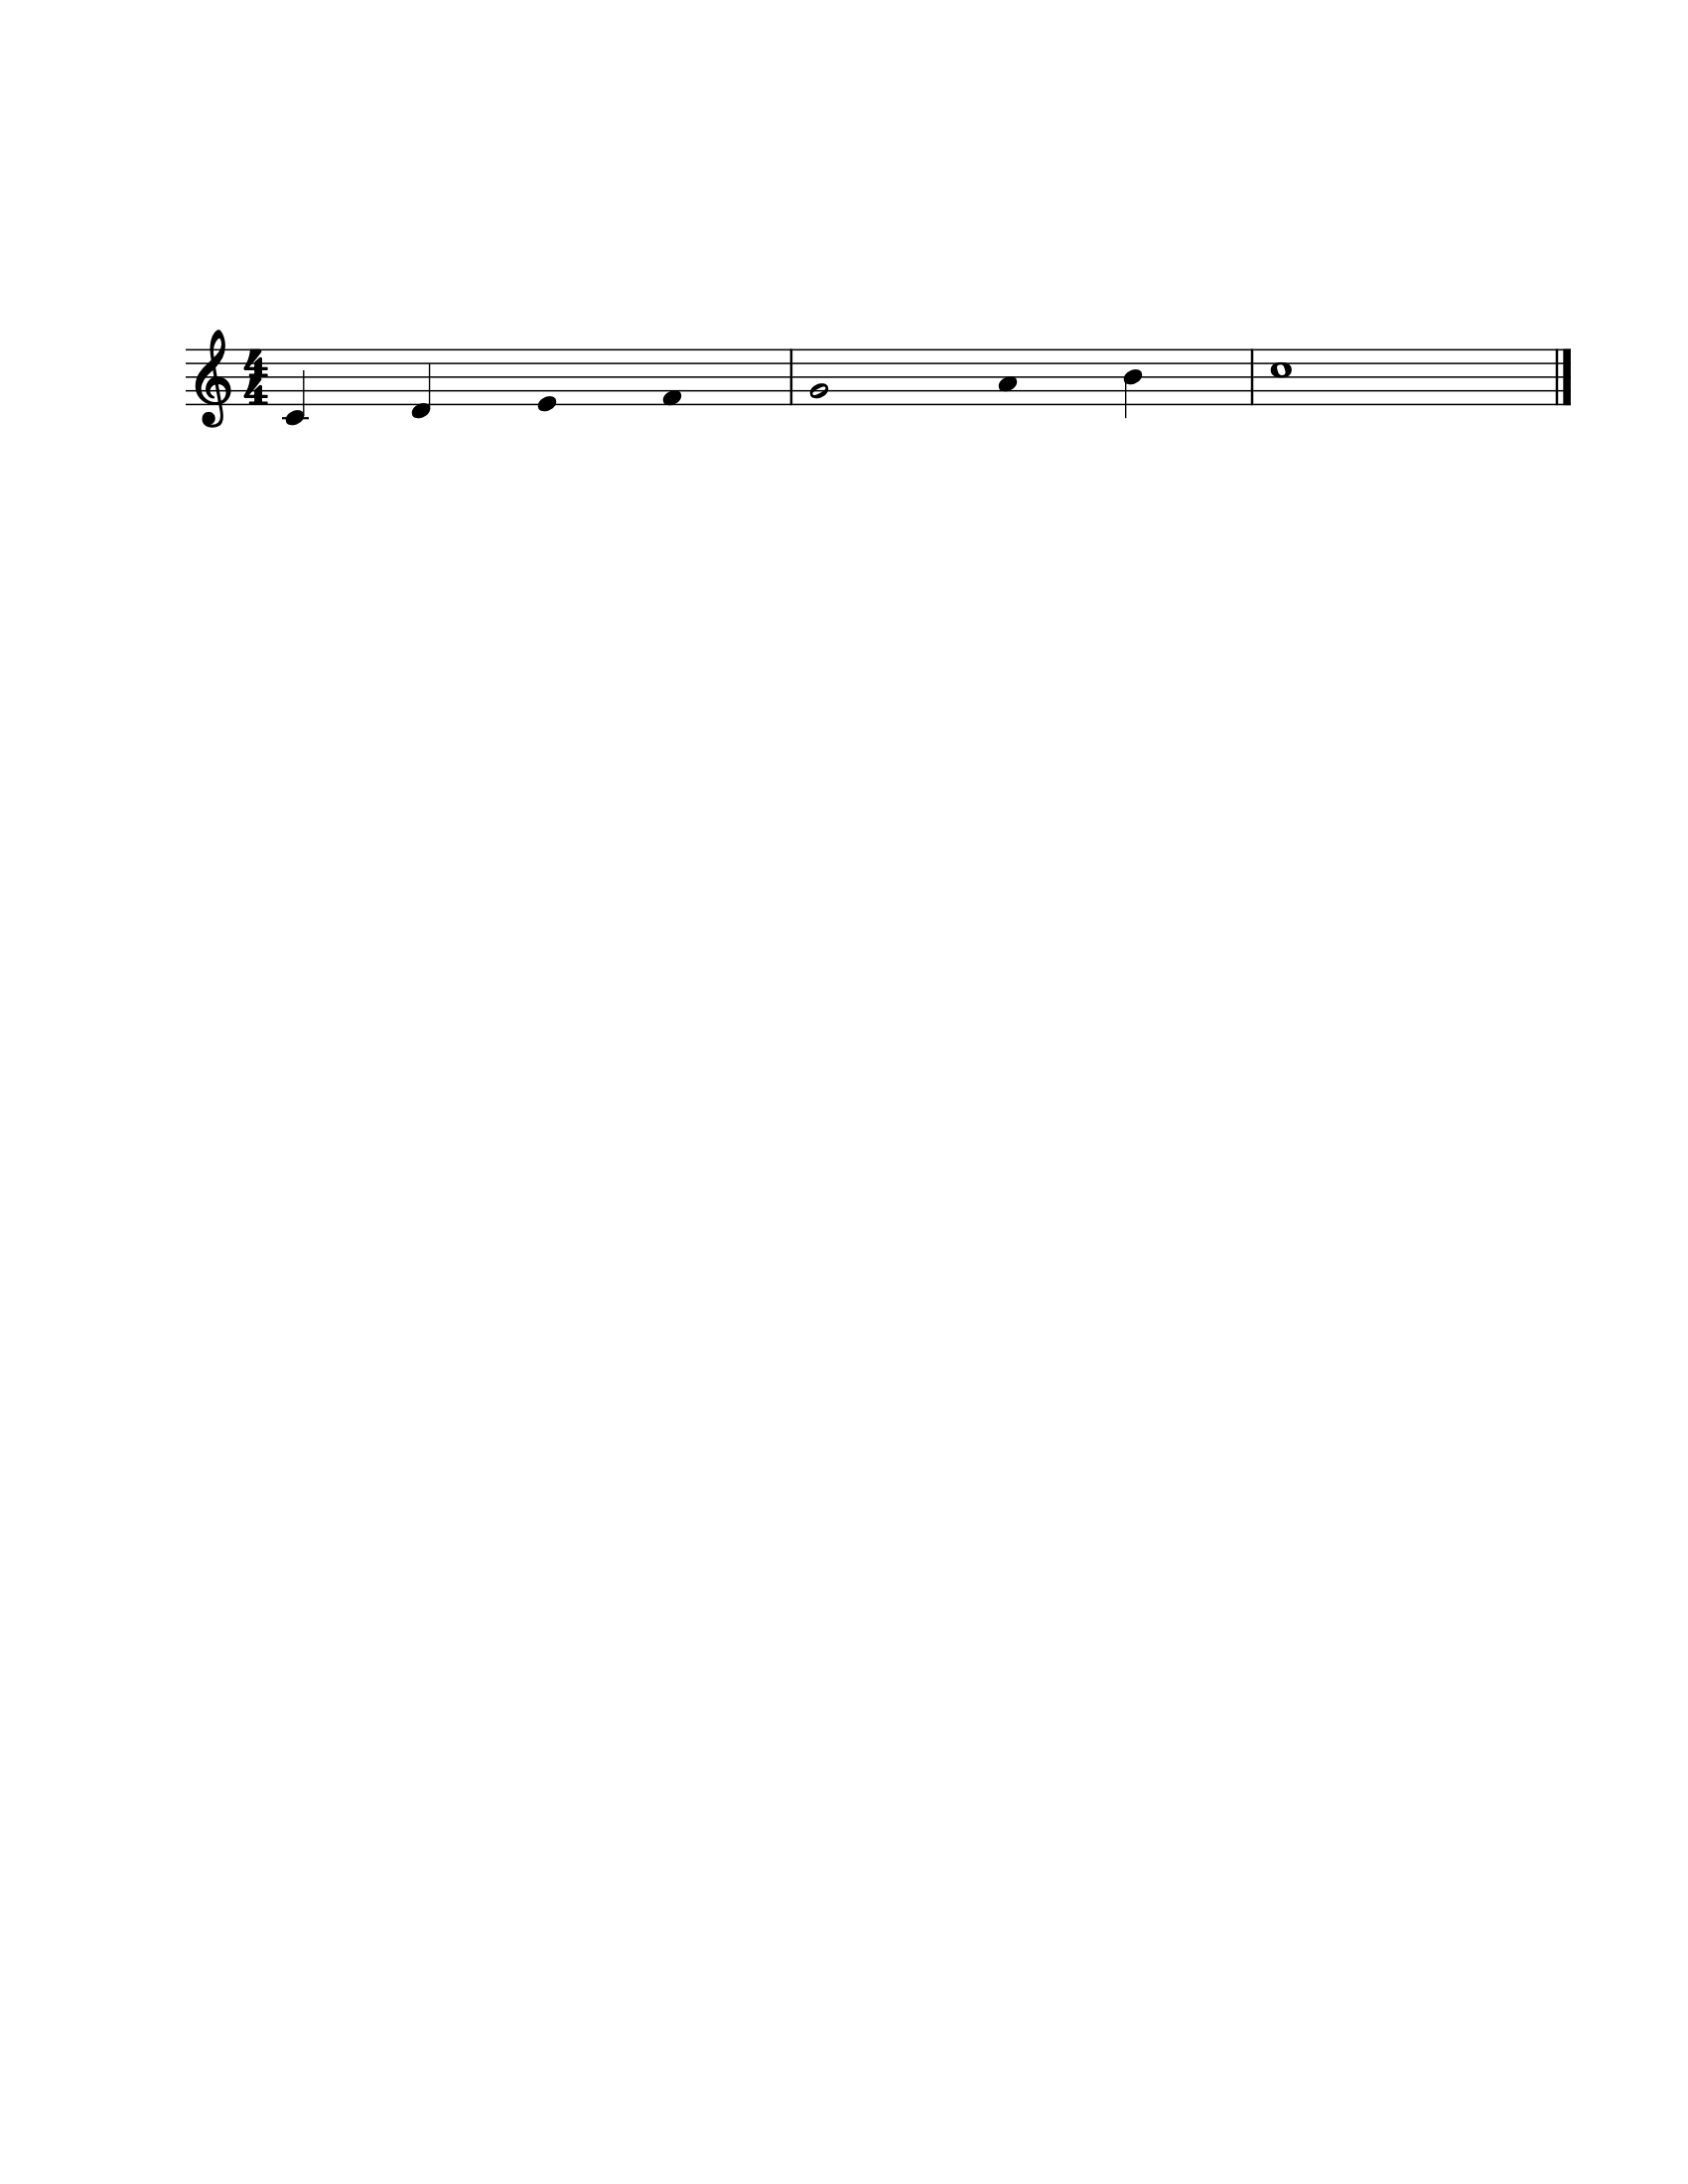

In [20]:
class NoStemState(tinyNotation.State):
    def end(self):
        for n in self.affectedTokens:
            n.stemDirection = 'none'
tnc.bracketStateMapping['nostem'] = NoStemState
tnc.load("4/4 c4 d nostem{e f g2 a4} b c'1")
tnc.parse().stream.show()

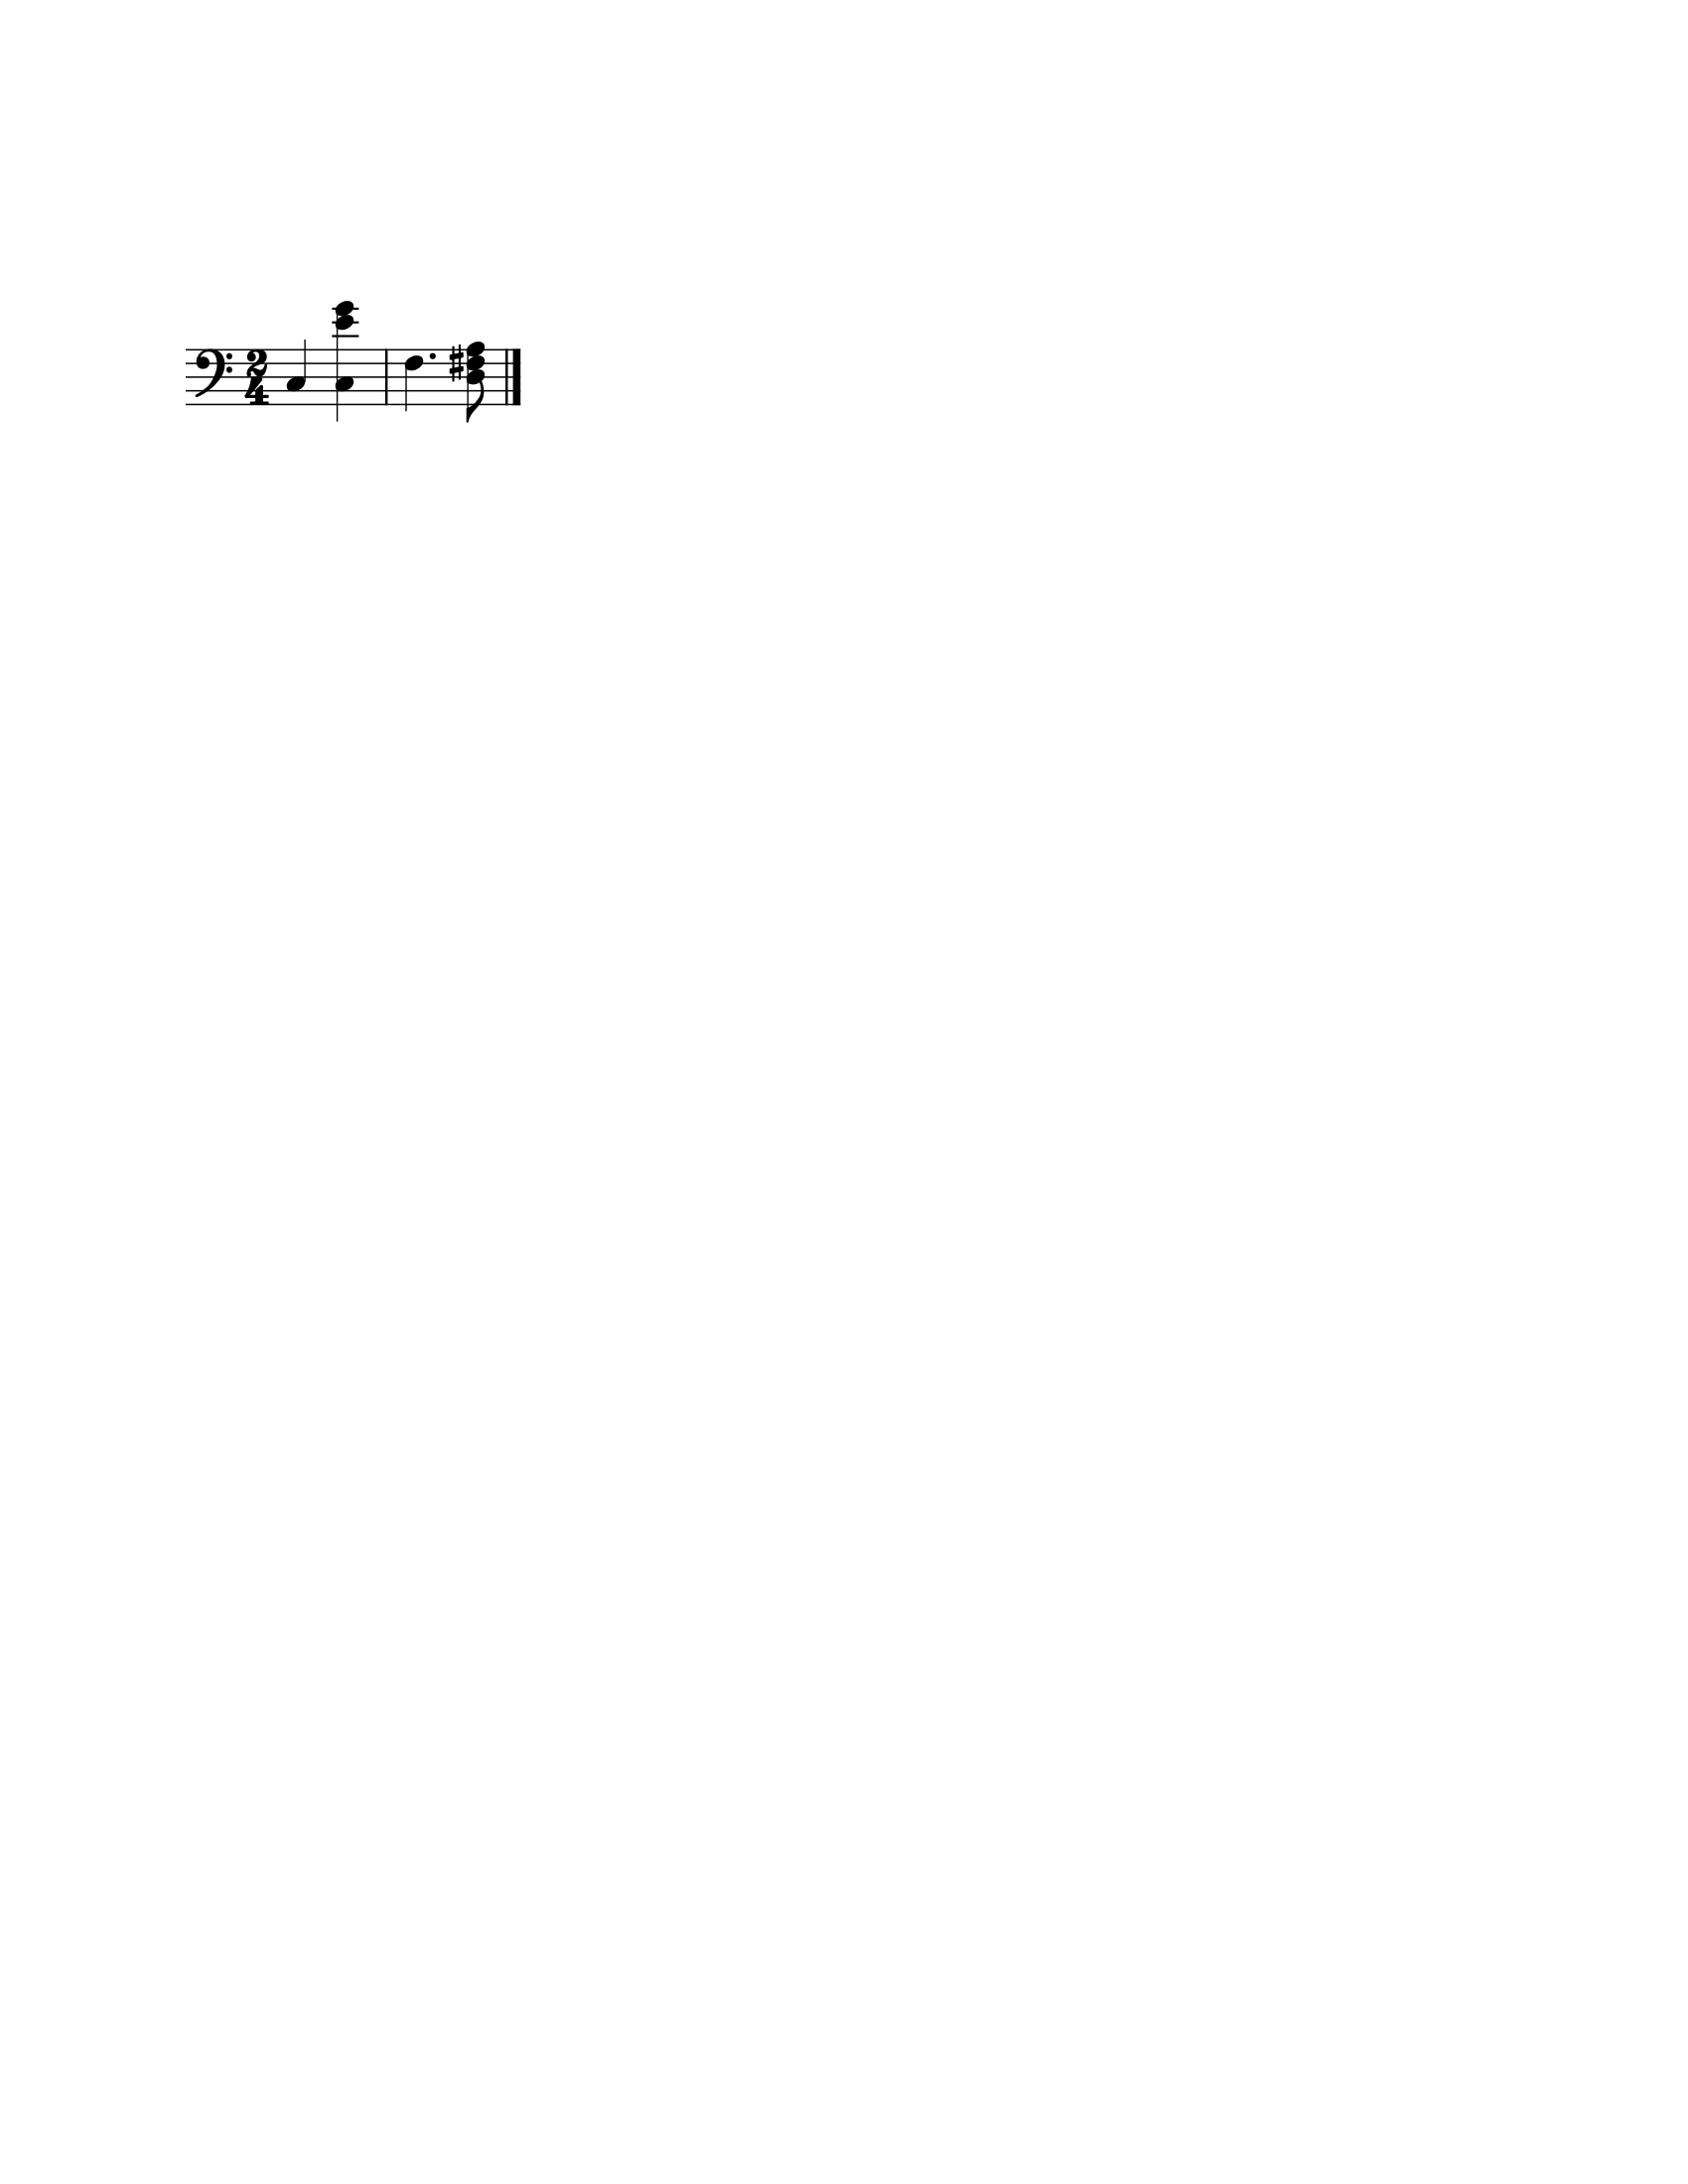

In [21]:
class ChordState(tinyNotation.State):
    def affectTokenAfterParse(self, n):
       super(ChordState, self).affectTokenAfterParse(n)
       return None # do not append Note object

    def end(self):
        ch = chord.Chord(self.affectedTokens)
        ch.duration = self.affectedTokens[0].duration
        return ch

tnc.bracketStateMapping['chord'] = ChordState
tnc.load("2/4 C4 chord{C4 e g} F.4 chord{D8 F# A}")
tnc.parse().stream.show()